<a href="https://colab.research.google.com/github/chenoa23/NLP/blob/main/Neural_Network_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Project: Classification, Multiclass Classification, and Regression


---


Chenoa Nussberger\
Lauren Coba



## Part 1: Coding Tutorials

# **1. Build Your First Neural Network with TensorFlow: A Step-by-Step Guide**

https://drlee.io/build-your-first-neural-network-with-tensorflow-a-step-by-step-guide-1dd3e6652cf1

## Step 1: Explore and Preprocess the Data


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/deep-learning-essentials/main/HeartDiseaseTrain-Test.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['target'])  # 'class' is your target column
y = df['target'].values

# Encode the categorical features in X
X = pd.get_dummies(X, drop_first=True)

# Encode the binary target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # use this for binary classification

n_features = X.shape[1]
# y will now be 0 for one class (e.g., 'good') and 1 for the other class (e.g., 'bad')

## Step 2: Split the Data


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Step 3: Define and Compile the Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Fit the Model


In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

## Step 5: Evaluate the Model


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.844


## Step 6: Make Predictions


In [ ]:
import numpy as np

# Access the first row using iloc
row = X_test.iloc[0].values
row = row.reshape(1, -1).astype(float) # Use float instead of np.float
yhat = model.predict(row)
print('Predicted: %.3f' % yhat[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted: 0.939


# **1. Challenge: Find Your Own Dataset and Build a Binary Classification Model with TensorFlow**

## Step 1: Find a Dataset


https://www.kaggle.com/datasets/abdallahwagih/spam-emails

## Step 2: Load and Explore the Dataset


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/CAI2300C/spam.csv')

# Explore the dataset
print(df.head())
print(df.info())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


## Step 3: Preprocess the Data


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['Category'])  # 'Category' is your target column
y = df['Category'].values

# Encode the categorical features in X
X = pd.get_dummies(X, drop_first=True)

# Encode the binary target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# y will now be 0 for one class (e.g., 'good') and 1 for the other class (e.g., 'bad')

## Step 4: Split the Data and Train Your Model


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8249 - loss: 0.6515
Epoch 2/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8761 - loss: 0.4261
Epoch 3/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8683 - loss: 0.3648
Epoch 4/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3289
Epoch 5/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8633 - loss: 0.3026
Epoch 6/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8746 - loss: 0.2121
Epoch 7/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9903 - loss: 0.1064
Epoch 8/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 0.0593
Epoch 9/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0344
Epoch 10/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0222
Epoch 11/150
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0143
Epoch 12/150
117/117 ━━━━━━━━━━━━━━━━━━━━

## Step 5: Evaluate and Interpret Your Model


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.195


# **2. Building Binary Classification Models with Deep Learning and TensorFlow**

https://drlee.io/building-binary-classification-models-with-deep-learning-and-ten-ae61d3ae3d13

## Step 1: Loading the Data

In [ ]:
from pandas import read_csv

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = read_csv(url, header=None)

## Step 2: Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Split data into input (X) and output (y)
X, y = data.values[:, :-1], data.values[:, -1]
X = X.astype('float32')

# Convert class labels to binary
y = LabelEncoder().fit_transform(y)

## Step 3: Model Definition & Compilation

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Model Training

In [ ]:
# Fit the model to the data
model.fit(X, y, epochs=50, batch_size=32, verbose=0)

## Step 5: Evaluation and Prediction


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras. layers import Dense, Input

# Define the MLP model with the correct input shape (4 features)
model = Sequential ()
model.add (Input (shape=(4,))) # Explicitly set input shape
model.add (Dense (10, activation='relu'))
model.add (Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])
#... (Your training code) ...
# Test a prediction

import numpy as np
sample = [3.6216, 8.6661, -2.8073, -0.44699]

sample = np.array ([sample])
prediction = model.predict(sample)
print(f"Predicted Class: {round (prediction[0][0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Class: 0


# **3. Multiclass Classification with TensorFlow: A Step-by-Step Guide Using the Iris Dataset**

https://drlee.io/multiclass-classification-with-tensorflow-a-step-by-step-guide-using-the-iris-dataset-79045c870b86

## Step 1: Load and Explore the Data



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/iris.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

   Sepal Length  Sepal Width  Petal Length  Petal Width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Flower'], dtype='object')


## Step 2: Preprocess the Data


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['Flower'])  # 'Flower' is the target column
y = df['Flower'].values

# Encode the target variable y (Flower)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts the three flower types into 0, 1, or 2

# Check the number of features
n_features = X.shape[1]

## Step 3: Split the Data into Train and Test Sets


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 4: Define the Model for Multiclass Classification


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 neurons for 3 classes (Iris-setosa, Iris-versicolor, Iris-virginica)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Train the Model


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

## Step 6: Evaluate the Model


In [ ]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.700


## Step 7: Make Predictions


In [ ]:
# Example prediction
import numpy as np

sample = np.array([[5.0, 3.6, 1.4, 0.2]])  # Example input for a new flower
prediction = model.predict(sample)

# Convert the prediction probabilities into a class label
predicted_class = np.argmax(prediction, axis=1)
print('Predicted class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: [0]


# **Addendum: Building a Regression Model to Predict Car Prices with TensorFlow**

## Step 1: Load and Explore the Dataset


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/CooperUnionDataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

## Step 2: Preprocessing the Data


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['MSRP'])  # MSRP is the target column
y = df['MSRP'].values

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale the numerical features (since regression often benefits from scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check the number of features
n_features = X.shape[1]

## Step 3: Split the Data


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 4: Define the Regression Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output neuron for regression (predicting price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Train the Model


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

## Step 6: Evaluate the Model


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Test Mean Squared Error: %.2f' % loss)

Test Mean Squared Error: 285432544.00


## Step 7: Make Predictions


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/CooperUnionDataset.csv')

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['MSRP'])  # MSRP is the target column
y = df['MSRP'].values

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.head())  # These columns will be the input for the model - predictions
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Check the number of features
n_features = X_scaled.shape[1]

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output neuron for regression (predicting price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Test Mean Squared Error: %.2f' % loss)

# Example prediction

# Create a sample input with all necessary features
# Make sure the sample matches the structure of X_encoded (use the same columns)
sample = pd.DataFrame({
    'Year': [2011],
    'Engine HP': [335],
    'Engine Cylinders': [6],
    'highway MPG': [26],
    'city mpg': [19],
    'Popularity': [3916],
    # Add one-hot encoded columns for categorical features
    'Make_BMW': [1],
    'Model_1 Series M': [1],
    'Engine Fuel Type_premium unleaded (required)': [1],
    'Transmission Type_MANUAL': [1],
    'Driven_Wheels_rear wheel drive': [1],
    'Number of Doors_2': [1],
    'Market Category_Factory Tuner,Luxury,High-Performance': [1],
    'Vehicle Size_Compact': [1],
    'Vehicle Style_Coupe': [1]
})

# Ensure the columns align with the training data (if columns differ, fill in missing ones with 0)
sample = sample.reindex(columns=X_encoded.columns, fill_value=0)

# Scale the sample data
sample_scaled = scaler.transform(sample)

# Predict the MSRP for the new car
prediction = model.predict(sample_scaled)
print('Predicted MSRP: %.2f' % prediction[0])

   Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  city mpg  \
0  2011      335.0               6.0              2.0           26        19   
1  2011      300.0               6.0              2.0           28        19   
2  2011      300.0               6.0              2.0           28        20   
3  2011      230.0               6.0              2.0           28        18   
4  2011      230.0               6.0              2.0           28        18   

   Popularity  Make_Alfa Romeo  Make_Aston Martin  Make_Audi  ...  \
0        3916            False              False      False  ...   
1        3916            False              False      False  ...   
2        3916            False              False      False  ...   
3        3916            False              False      False  ...   
4        3916            False              False      False  ...   

   Vehicle Style_Convertible  Vehicle Style_Convertible SUV  \
0                      False             

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Mean Squared Error: 330395136.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted MSRP: 104.29


<ipython-input-223-9504acb90858>:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted MSRP: %.2f' % prediction[0])


# **Addendum: Exploring Model Summary, Visualization, and Saving/Loading in TensorFloW**

## Step 1: Summarizing the Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Summarize the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187 (748.00 B)

 Trainable params: 187 (748.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 2: Plotting the Model Architecture


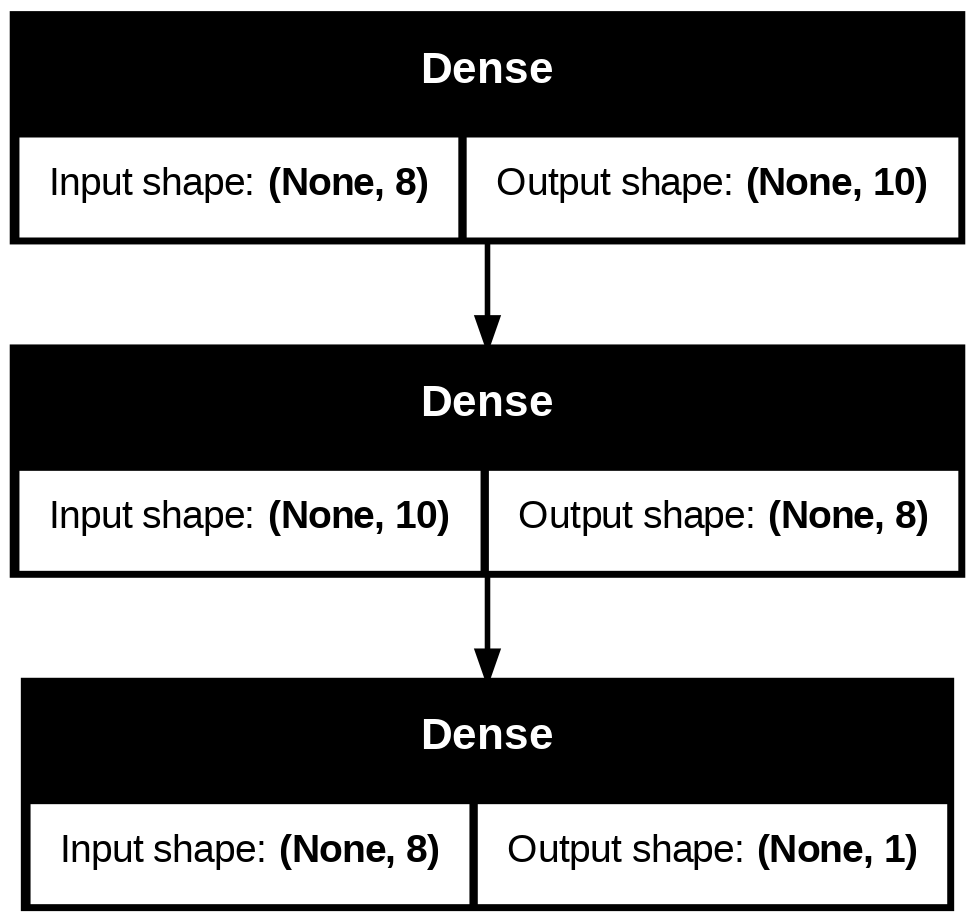

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Plot the model and save it as an image
plot_model(model, 'model.png', show_shapes=True)

## Step 3: Saving the Model


In [ ]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# Save the model to a file
model.save('model.h5')

## Step 4: Loading and Using a Saved Model


In [ ]:
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
import numpy as np # Import numpy

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Load the model from file
model = load_model('model.h5')

# Make a prediction with a sample row of data
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
# Convert the row to a NumPy array
row = np.array([row]) # Convert the list to a numpy array
yhat = model.predict(row)

# Output the prediction
print('Predicted: %.3f' % yhat[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted: 0.789


<ipython-input-227-8bb3be2dfdcf>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat[0])


# **Part 2: Create Your Own Models**


## 1: Find a New Dataset: Choose a publicly available dataset that is different from those used in the tutorials. https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


## **Task 1 - Binary Classification: Create a binary classification neural network model**

### Step 1: Loading the Data


In [ ]:
from pandas import read_csv

# Load the dataset
url = '/content/drive/MyDrive/CAI2300C/winequality-red.csv'
data = read_csv(url, header=None)

# Display the first few rows of the dataset
print(data.head())

# Display the column names
print(data.columns)

              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7          0.0             1.9      0.076   
2            7.8              0.88          0.0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968   3.2       0.68   
3                 15.0                  54.0    0.997  3.26       0.65   
4                 17.0                  60.0    0.998  3.16       0.58   

        10       11  
0  alcohol  quality  
1      9.4        5  
2      9.8        5 

### Step 2: Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Split data into input (X) and output (y)
X, y = data.iloc[1:, :-1], data.iloc[1:, -1]
X = X.astype('float')

# Convert class labels to binary
y = LabelEncoder().fit_transform(y)

### Step 3: Model Definition & Compilation


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Model Training

In [ ]:
# Fit the model to the data
model.fit(X, y, epochs=50, batch_size=32, verbose=0)

### Step 5: Evaluation and Prediction

In [ ]:
import numpy as np

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy:.3f}")

# Convert the sample list to a NumPy array before prediction

# Ensure 'sample' has 11 features
sample = [0, 0, 0, 0, 0, 0, 0, 3.6216, 8.6661, -2.8073, -0.44699] # Corrected sample data with 11 features
sample_array = np.array ([sample])
prediction = model. predict (sample_array)
print(f"Predicted Class: {round (prediction[0][0])}")

# Test a prediction - Ensure consistency with training data
# 'sample' should have 11 features and be preprocessed if necessary
sample = [0, 0, 0, 0, 0, 0, 0, 3.6216, 8.6661, -2.8073, -0.44699] # Corrected sample data with 11 features
# Apply any necessary preprocessing steps to 'sample'
prediction = model.predict(np.array ([sample]))
print(f"Predicted Class:{round (prediction[0][0])}")

Model Accuracy: 0.033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class:1


# **Task 2 - Multiclass Classification: Create a multiclass classification neural network model.**

## Step 1: Load and Explore the Data


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAI2300C/winequality-red.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Step 2: Preprocess the Data


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['quality'])  # 'quality' is the target column
y = df['quality'].values

# Encode the target variable y (quality)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts the features into 0, 1, or 2

# Check the number of features
n_features = X.shape[1]

## Step 3: Split the Data into Train and Test Sets



In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 4: Define the Model for Multiclass Classification



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(11, activation='softmax'))  # 11 neurons for 11 features

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Train the Model


In [ ]:
import numpy as np
# Assuming your original labels are 1, 2, 3, 4, and 5
# Convert them to 0, 1, 2, 3, 4
# if y values are 1,2,3,4, make sure to convert them to 0,1,2,3 instead
y = y -1
# Split into train and test datasets
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Check unique values in _train to confirm the range
print(np.unique(y_train))

[0 1 2 3 4 5]


## Step 6: Evaluate the Model

In [ ]:
import numpy as np
# Assuming your original labels are 1, 2, 3, 4, and 5
# Convert them to 0, 1, 2, 3, 4
# Check the minimum value of y and adjust the subtraction accordingly.
min_y = np. min (y)
y = y - min_y # if the minimum is 1, subtract 1. if 0, don't subtract
# Split into train and test datasets
# if y values are 1,2,3,4, make sure to convert them to 0,1,2,3 instead
X_train, X_test, _train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Check unique values in y_train to confirm the range
print(np. unique (y_train) )

[0 1 2 3 4 5]


## Step 7: Make Predictions


In [ ]:
# Example prediction
import numpy as np

sample = np.array([[0, 0, 0, 0, 0, 0, 0, 3.6216, 8.6661, -2.8073, -0.44699]])  # Example input for a new flower
prediction = model.predict(sample)

# Convert the prediction probabilities into a class label
predicted_class = np.argmax(prediction, axis=1)
print('Predicted class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: [2]


# Task 3 - Regression: Create a regression neural network model.


# Regression Dataset: https://www.kaggle.com/datasets/prokshitha/home-value-insights

## Step 1: Load and Explore the Dataset


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAI2300C/house_price_regression_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')


## Step 2: Preprocessing the Data


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['House_Price'])  # House_Price is the target column
y = df['House_Price'].values

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale the numerical features (since regression often benefits from scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check the number of features
n_features = X.shape[1]

## Step 3: Split the Data


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 4: Define the Regression Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output neuron for regression (predicting price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Train the Model


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

## Step 6: Evaluate the Model


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Test Mean Squared Error: %.2f' % loss)

Test Mean Squared Error: 299043848192.00


## Step 7: Make Predictions


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAI2300C/house_price_regression_dataset.csv')

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['House_Price'])
y = df['House_Price'].values

# Encode categorical features and get feature names
X = pd.get_dummies(X, drop_first=True)
feature_names = X.columns

# Scale the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the model
n_features = X_train.shape[1]  # Get the number of features
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer (for regression)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0) # X_test now has the correct number of features
print('Test Mean Squared Error: %.2f' % loss)

# Example prediction
sample = pd.DataFrame({
    'Square_Footage': [1360],
    'Num_Bedrooms': [2],
    'Num_Bathrooms': [1],
    'Year_Built': [1981],
    'Lot_Size': [0.599637],
    'Garage_Size': [3916],
    'Neighborhood_Quality': [5]
})

# Reindex the sample DataFrame to match the columns of X used during training
sample = sample.reindex(columns=feature_names, fill_value=0)

# Scale the sample data
sample_scaled = scaler.transform(sample)

# Predict the House Price
prediction = model.predict(sample_scaled)
print('Predicted House Price: %.2f' % prediction[0])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Mean Squared Error: 330118561792.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted House Price: 85331544.00


<ipython-input-245-e27c16471d0c>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted House Price: %.2f' % prediction[0])


# **Addendum: Exploring Model Summary, Visualization, and Saving/Loading in TensorFlow**

## Step 1: Summarizing the Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Summarize the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)                    │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187 (748.00 B)

 Trainable params: 187 (748.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 2: Plotting the Model Architecture


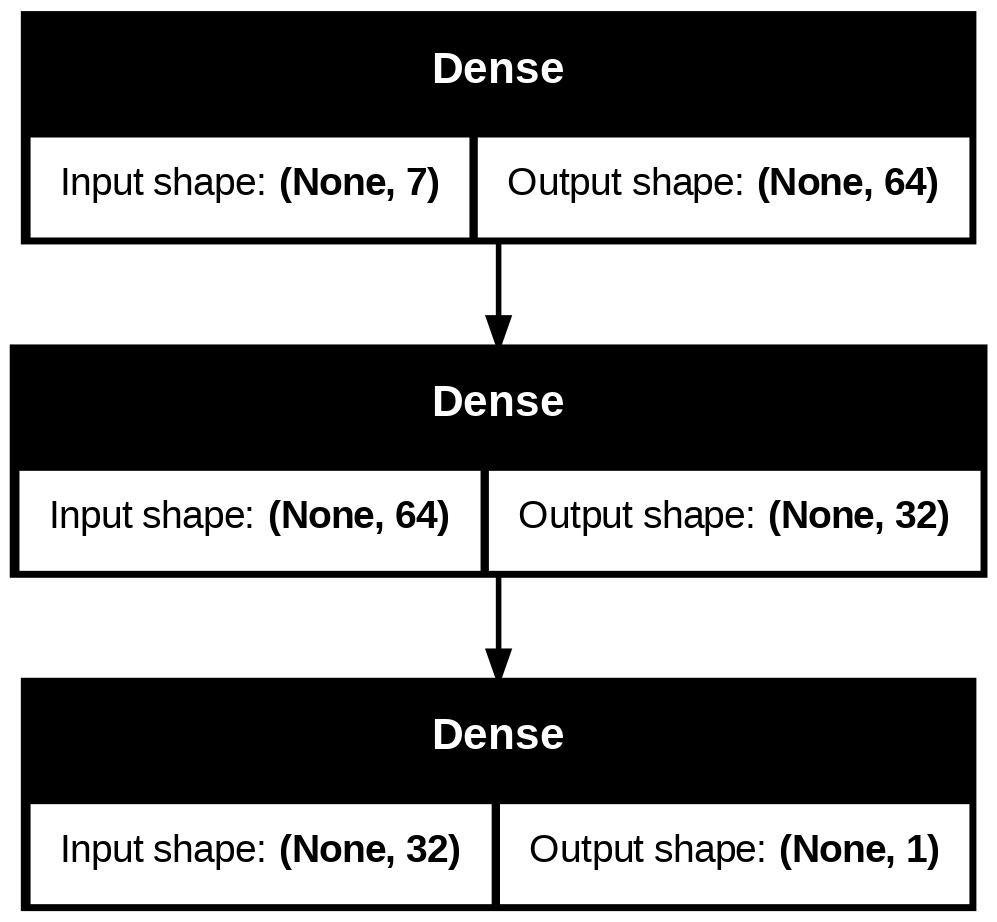

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Plot the model and save it as an image
plot_model(model, 'House_Price_model.png', show_shapes=True)

## Step 3: Saving the Model


In [ ]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# Save the model to a file
model.save('housing_price_model.h5')

## Step 4: Loading and Using a Saved Model


In [ ]:
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
import numpy as np # Import numpy

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Load the model from file
model = load_model('housing_price_model.h5')

# Make a prediction with a sample row of data
row = [4272,3,3,2016]
# Convert the row to a NumPy array
row = np.array([row]) # Convert the list to a numpy array
yhat = model.predict(row)

# Output the prediction
print('Predicted: %.3f' % yhat[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted: 1.000


<ipython-input-249-b66ba5d316c5>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat[0])


# **Part 3: Reflection**

1. Aha! (New Things Learned): Share any new techniques or concepts that were unfamiliar to you before this assignment.

I learned a lot about using TensorFlow for multi-class classification. The step-by-step guides helped me understand data preprocessing, training a model, and how to evaluate its performance.

2. Huh? (Confusions): Note any areas of confusion or parts of the assignment that were difficult to grasp.

I found some parts of TensorFlow a bit hard to understand, especially the model structure and how to adjust hyperparameters. It was also confusing to differentiate between the types of layers and how they affect the model's performance.


3. Cool!: Highlight the parts of the project you found particularly interesting or enjoyable.

I enjoyed building a neural network from scratch. Watching how the model improved with each iteration and learning about different metrics was exciting. The visualizations of training results were really helpful.

4. Gotcha! (Changed Perspective): Describe any preconceived notions that changed as a result of completing this assignment.

Before this assignment, I thought machine learning was just math. Now, I see it’s much more complex, involving careful decisions about model design and understanding the data. It’s clear that knowing the context of the problem is just as important as the algorithms.

5. Summary: Summarize what you have learned and how you can apply this knowledge to other projects or future work.

I gained a better understanding of multi-class classification and neural networks through these articles. I learned how to use TensorFlow effectively, including data preparation and model evaluation. This knowledge will help me in future projects as I can apply these techniques to other datasets and problems in machine learning.


